Basic imports and definitions.

In [1]:
import pandas as pd
import numpy as np
import sqlite3

import matplotlib.pyplot as plt
import IPython.display
# %config InlineBackend.figure_format = 'retina'
IPython.display.set_matplotlib_formats('svg')

def load_data(sqlite_file, channel='%'):
    connection = sqlite3.connect(sqlite_file)

    df = pd.read_sql_query(con=connection, sql="""
        SELECT *
        FROM messages
        WHERE channel LIKE (?)
        AND username != 'SYSTEM'
        AND username NOT LIKE '%bot'
        AND message_text NOT LIKE '!%'
    """, params=[channel], index_col=['time'], parse_dates=['time'])

    return df

In [3]:
df = load_data('data/database.sqlite', channel='xqcow')[['topic', 'message_text', 'viewer_count']]
df

,topic,message_text,viewer_count
time,,,
2020-09-01 02:58:34.751000+00:00,Among Us,HAHAHAHAHAHHAHA DESERVED OMEGALUL,54298
2020-09-01 02:58:34.752000+00:00,Among Us,KARMA OMEGALUL,54298
2020-09-01 02:58:34.752000+00:00,Among Us,xqcL xqcow,54298
2020-09-01 02:58:34.752000+00:00,Among Us,,54298
2020-09-01 02:58:34.752000+00:00,Among Us,???????????????????????????????,54298
...,...,...,...
2020-09-01 06:12:29.387000+00:00,Overwatch,PepePls,30937
2020-09-01 06:12:29.387000+00:00,Overwatch,RISE AGAINST PagChomp,30937
2020-09-01 06:12:29.588000+00:00,Overwatch,gachiBASS,30937


Plot an entropy measure of 10-second chunks as a function of time.

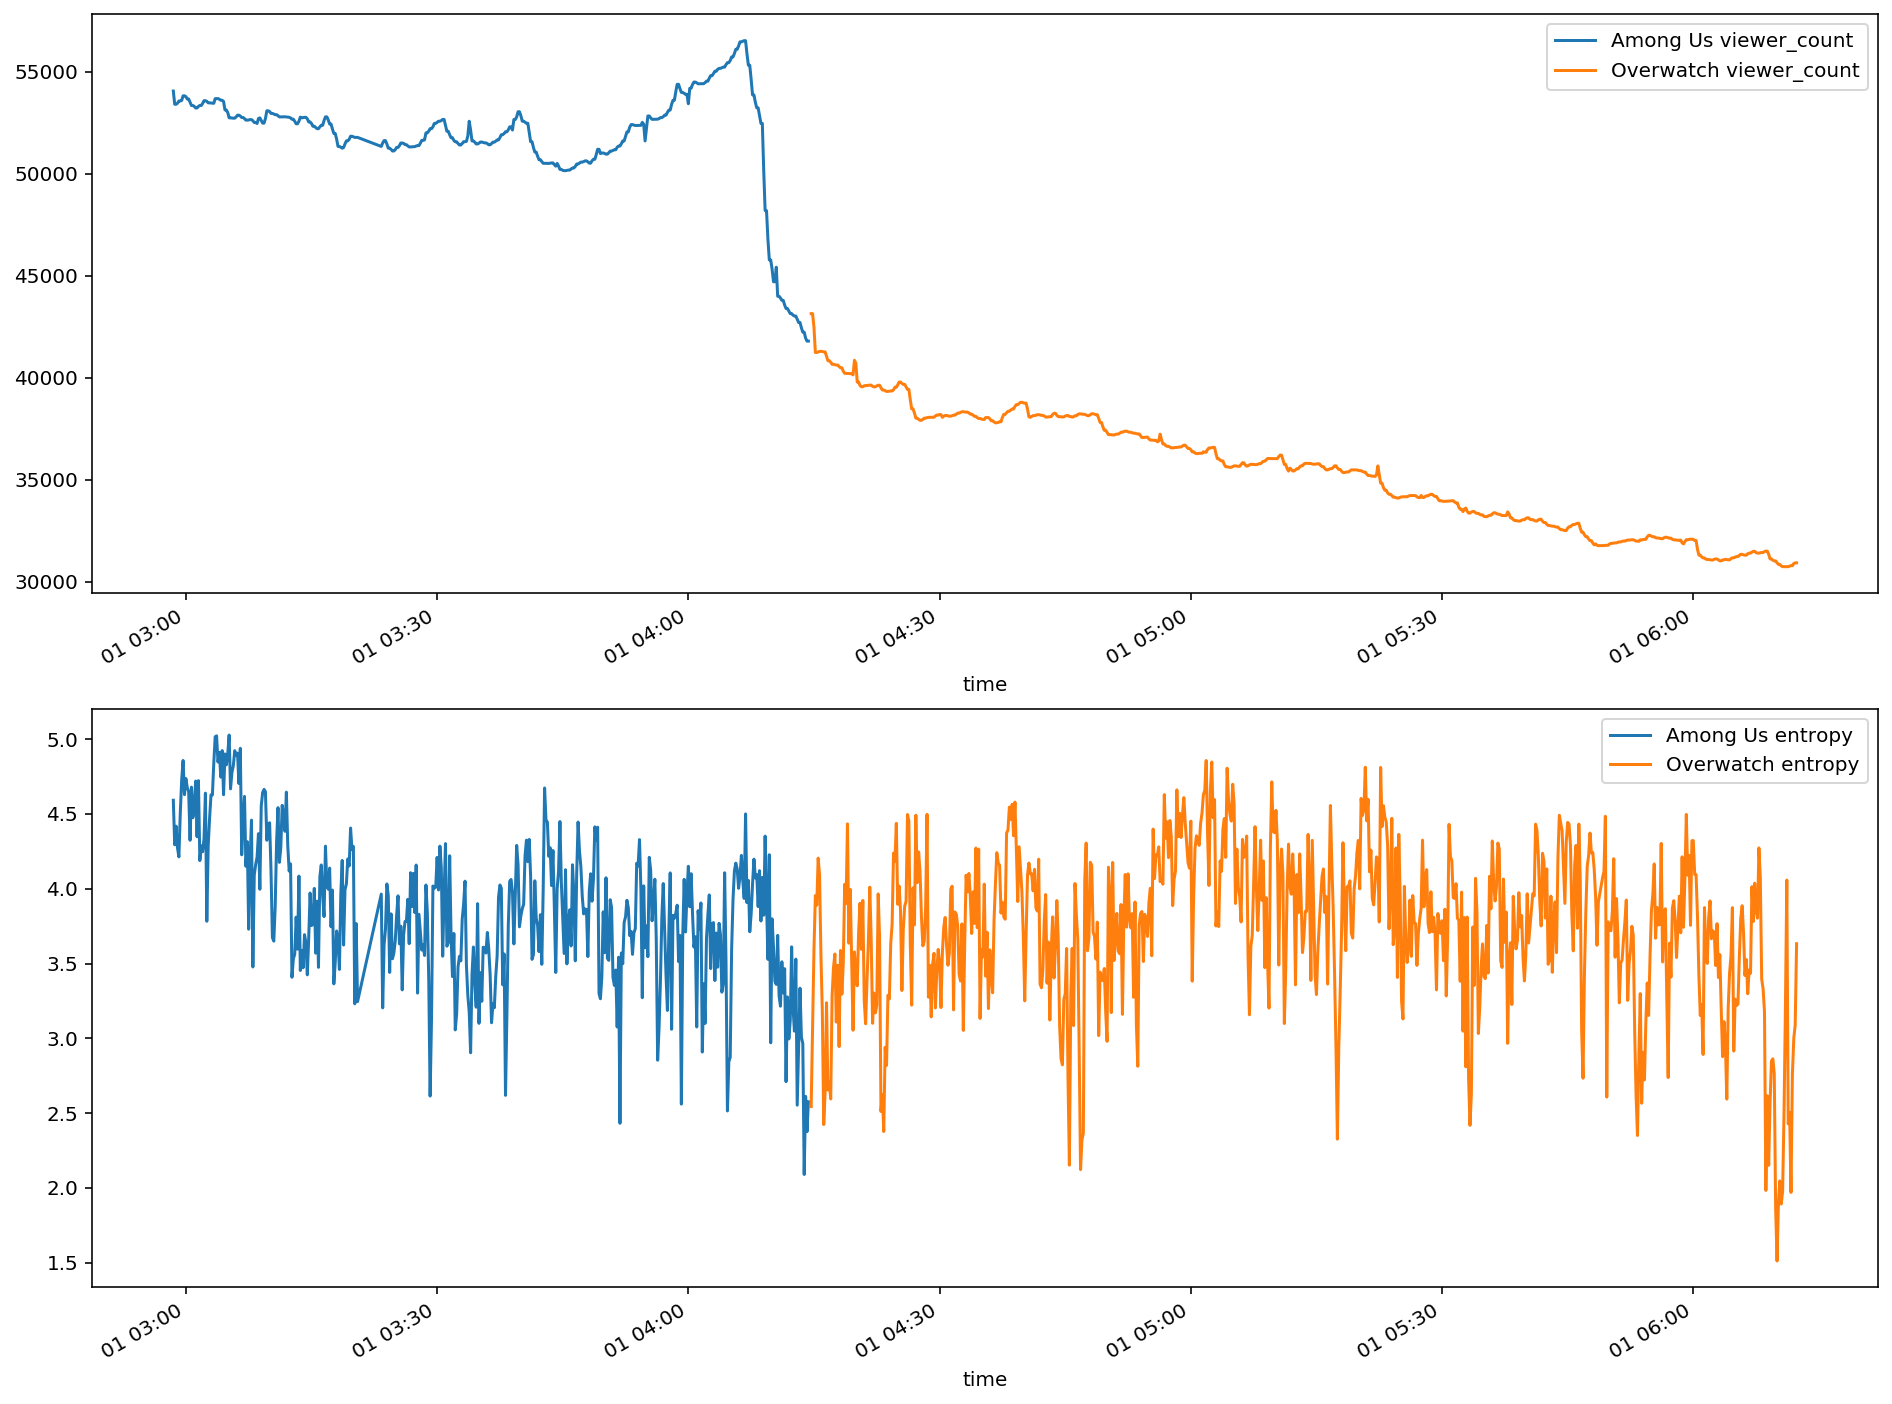

In [4]:
resampled = df.resample('10S').aggregate({'topic': lambda x: x[0] if len(x) > 0 else '',
                                          'message_text': lambda x: list( map(lambda x: x[:10].lower(), ' '.join(x).split()) ),
                                          'viewer_count': np.mean})

def entropy(ls):
    _, counts = np.unique(ls, return_counts=True)
    ps = counts / len(ls)
    
    return -(ps*np.log(ps)).sum()

fig, axs = plt.subplots(2, 1, figsize=(16,13))
axs = axs.flatten()

for topic in df['topic'].unique():
    section = resampled[resampled['topic'] == topic]
    section['viewer_count'].plot(ax=axs[0], lw=1.5, label=f'{topic} viewer_count');
    section['message_text'].apply(entropy).plot(ax=axs[1], lw=1.5, label=f'{topic} entropy');

[ax.legend() for ax in axs];

---
Open images in system viewer

In [ ]:
!open $(sqlite3 data/database.sqlite "SELECT 'data/images/' || image_id || '.png' FROM messages WHERE message_text LIKE '%Kappa%' LIMIT 20")